In [1]:
# Important numbers

total_repos = 416266
repos_with_actions = 11079 # from count_dir.go
quotient = repos_with_actions / total_repos
print(quotient * 100)

2.6615193169752036


In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Getting most used actions (TABLE II)

table_df = pd.read_csv (r'table.csv', names=['Action', 'Usages', 'Description'])
table_df.to_csv('table2_most_used_actions.csv', index=False)
table_df.head()

,Action,Usages,Description
0,actions/checkout,27433,NaN
1,actions/setup-python,5900,NaN
2,actions/cache,5649,NaN
3,actions/upload-artifact,4882,NaN
4,actions/setup-java,3414,NaN


In [94]:
import json
import csv
# Getting most used categories (TABLE I)
fno_uncategorised = 'data/filtered/cat_result_fullname.json'
fwith_uncateogrised = ''

f = open(fno_uncategorised)
data = json.load(f)

total_actions = len(data)

categories = {
  "Continuous integration" : 0, "Utilities" : 0, "Deployment" : 0, "Code quality" : 0,
  "Publishing" : 0, "Code review" : 0, "Testing" : 0, "Dependency management" : 0, "Open Source management" : 0,
  "Project management" : 0, "Container CI" : 0, "Chat" : 0, "Reporting" : 0, "Security" : 0,
  "Community" : 0, "Mobile CI" : 0, "Monitoring" : 0, "IDEs" : 0, "Mobile" : 0,"Desktop tools" : 0, "Support" : 0, "Code search" : 0, "API management" : 0,
  "Time tracking" : 0, "Localization" : 0, "GitHub Sponsors" : 0, "Code Scanning Ready" : 0
}

for d in data:
    cats = data[d]
    for c in cats:
        x = categories[c] + 1
        categories[c] = x

f.close()
total_categories = 0
with open('table1_categories.csv', 'w', newline='') as f:
    # create the csv writer
    writer = csv.writer(f)
    header = ['Github Action categories', 'Frequency', 'Percentage']
    writer.writerow(header)
    for c in categories:
        percent =  "{:.2%}".format(categories[c] / total_actions)
        str = c, categories[c], percent
        writer.writerow(str)
        total_categories = total_categories + categories[c]

    total_percent =  "{:.2%}".format(total_categories/total_actions)
    footer = ['Total Actions', total_actions, total_percent]
    print(total_categories)
    writer.writerow(footer)



# cat_df = pd.DataFrame.from_dict([categories])
# cat_df.to_csv('table1_categories.csv')


1561
1.802540415704388


<BarContainer object of 8 artists>

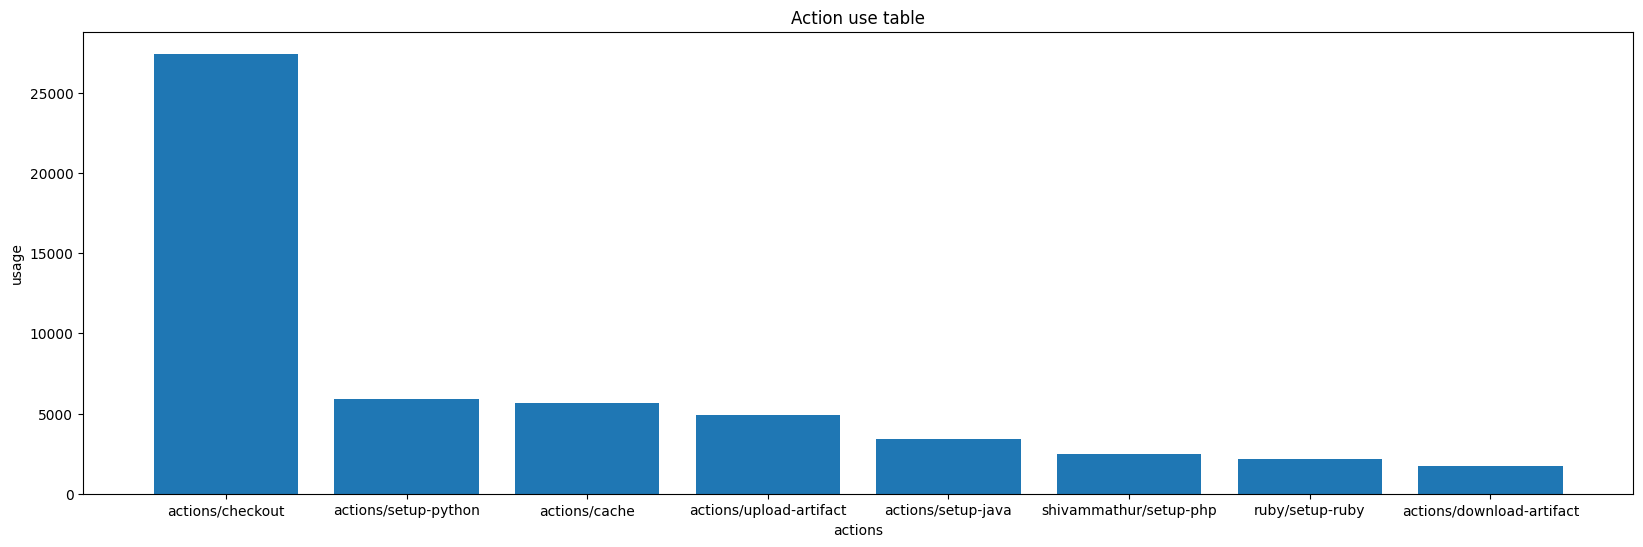

In [10]:
from matplotlib.pyplot import figure

x_data = list(table_df['action_name'].head(8))
y_data = list(table_df['usages'].head(8))
plt.figure(figsize=(20,6))
plt.title("Action use table")
plt.xlabel("actions")
plt.ylabel("usage")
plt.bar(x_data, y_data)


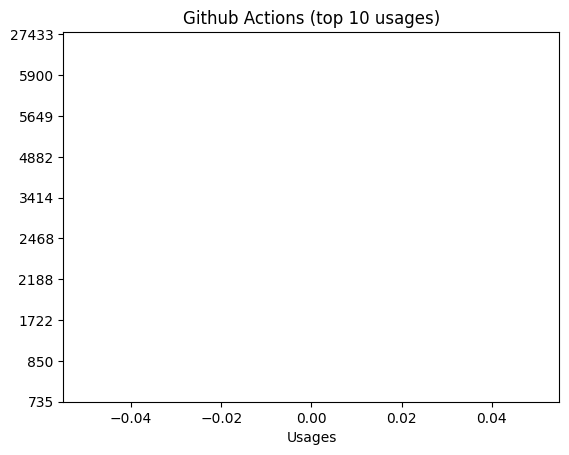

In [3]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcdefaults()
fig, ax = plt.subplots()

actions = list(table_df['action_name'].head(10))
y_pos = np.arange(len(actions))
usages = list(table_df['usages'].head(10))

ax.barh(y_pos, usages, align='center')
ax.set_yticks(y_pos, labels=actions)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Usages')
ax.set_title('Github Actions (top 10 usages)')
fig.savefig("test.png")
plt.show()